## Taylor Swift Spotify Data Sets

Will explore regarding:
 * Her most popular albums
 * What characterized her albums (based on available features)
 * Correlation of what features are correlated with her most popular albums and songs
 
Data source: https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset


Data description:
The columns in this dataset are:

`name` - the name of the song

`album` - the name of the album

`release_date` - the day month and year the album was released

`track number` - the order the song appears on the album

`id` - the Spotify id for the song

`uri` - the Spotify uri for the song

`acousticness` - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

`danceability` - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

`energy` - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

`instrumentalness` - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

`liveness` - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

`loudness` - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

`speechiness` - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

`tempo` - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

`valence` - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

`popularity` - the popularity of the song from 0 to 100

`duration_ms` - The duration of the track in milliseconds.

In [289]:
#libraries

import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats


import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8) #to adjust plot chart size

In [2]:
#read the data

df = pd.read_csv('/Users/regina.dewi/Downloads/taylor_swift_spotify.csv')

## 1. Understanding the data


In [4]:
#check the data

df.describe()

Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1265.000000   1265.000000   1265.000000   1265.000000  1265.000000   
mean    632.000000     10.536759      0.321938      0.593117     0.563992   
std     365.318354      7.245936      0.342390      0.111157     0.201305   
min       0.000000      1.000000      0.000025      0.175000     0.063900   
25%     316.000000      5.000000      0.020200      0.529000     0.398000   
50%     632.000000     10.000000      0.151000      0.599000     0.579000   
75%     948.000000     14.000000      0.686000      0.662000     0.729000   
max    1264.000000     46.000000      0.983000      0.897000     0.950000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       1265.000000  1265.000000  1265.000000  1265.000000  1265.000000   
mean           0.090735     0.162244    -7.911692     0.113597   120.876979   
std            0.235631     0.121155     3.184218     0.232660    30.248042   
min            0.000000     0.029100   -17.932000     0.023100    47.607000   
25%            0.000000     0.099600   -10.147000     0.030200    95.997000   
50%            0.000005     0.119000    -7.369000     0.036300   118.984000   
75%            0.000898     0.178000    -5.572000     0.055300   141.950000   
max            0.918000     0.931000    -1.953000     0.957000   208.918000   

           valence   popularity    duration_ms  
count  1265.000000  1265.000000    1265.000000  
mean      0.414598    39.592095  230381.618182  
std       0.203684    23.433611   59389.217176  
min       0.037400     0.000000   41769.000000  
25%       0.236000    22.000000  208986.000000  
50%       0.412000    40.000000  233626.000000  
75%       0.551000    59.000000  256053.000000  
max       0.966000    97.000000  613026.000000

In [6]:
df.head()

Unnamed: 0                                    name  \
0           0                           Lavender Haze   
1           1                                  Maroon   
2           2                               Anti-Hero   
3           3  Snow On The Beach (feat. Lana Del Rey)   
4           4                 You're On Your Own, Kid   

                     album release_date  track_number                      id  \
0  Midnights (3am Edition)   2022-10-22             1  4g2c7NoTWAOSYDy44l9nub   
1  Midnights (3am Edition)   2022-10-22             2  199E1RRrVmVTQqBXih5qRC   
2  Midnights (3am Edition)   2022-10-22             3  02Zkkf2zMkwRGQjZ7T4p8f   
3  Midnights (3am Edition)   2022-10-22             4  6ADDIJxxqzM9LMpm78yzQG   
4  Midnights (3am Edition)   2022-10-22             5  7gVWKBcfIW93YxNBi3ApIE   

                                    uri  acousticness  danceability  energy  \
0  spotify:track:4g2c7NoTWAOSYDy44l9nub        0.2040         0.735   0.444   
1  spotify:track:199E1RRrVmVTQqBXih5qRC        0.0593         0.658   0.378   
2  spotify:track:02Zkkf2zMkwRGQjZ7T4p8f        0.1330         0.638   0.634   
3  spotify:track:6ADDIJxxqzM9LMpm78yzQG        0.7350         0.659   0.323   
4  spotify:track:7gVWKBcfIW93YxNBi3ApIE        0.4160         0.694   0.380   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0          0.001200    0.1700   -10.519       0.0684   97.038   0.0984   
1          0.000000    0.0976    -8.300       0.0379  108.034   0.0382   
2          0.000001    0.1520    -6.582       0.0457   96.953   0.5190   
3          0.003210    0.1160   -13.425       0.0436  110.007   0.1540   
4          0.000008    0.1260   -10.307       0.0614  120.044   0.3760   

   popularity  duration_ms  
0          87       202395  
1          87       218270  
2          88       200690  
3          86       256124  
4          87       194206

In [7]:
print('Data dimension (total row, total column) : {dim}' .format(dim=df.shape))
print('Count of unique songs : {count}' .format(count=df.name.nunique()))
print('Count of unique albums : {count}' .format(count=df.album.nunique()))


Data dimension (total row, total column) : (1265, 18)
Count of unique songs : 484
Count of unique albums : 47


In [8]:
#check null data
df.isnull().sum(axis = 0)

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [223]:
df.dtypes

Unnamed: 0            int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

In [9]:
#check unique album names
df['album'].unique()

array(['Midnights (3am Edition)', 'Midnights', "Red (Taylor's Version)",
       "Fearless (Taylor's Version)", 'evermore (deluxe version)',
       'evermore',
       'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
       'folklore (deluxe version)', 'folklore', 'Lover',
       'Taylor Swift Karaoke: reputation', 'reputation',
       'reputation (Big Machine Radio Release Special)',
       'reputation Stadium Tour Surprise Song Playlist',
       'Taylor Swift Karaoke: 1989 (Deluxe)', '1989',
       '1989 (Big Machine Radio Release Special)',
       'Taylor Swift Karaoke: 1989 (Deluxe Edition)',
       'Taylor Swift Karaoke: 1989', '1989 (Deluxe)',
       '1989 (Deluxe Edition)', 'Red', 'Red (Deluxe Edition)',
       'Red (Big Machine Radio Release Special)', 'Red (Karaoke Version)',
       'Taylor Swift Karaoke: Red', 'Speak Now (Japanese Version)',
       'Speak Now World Tour Live', 'Speak Now',
       'Speak Now (Big Machine Radio Release Specia

In [34]:
#display all rows

pd.set_option('display.max_rows', None)

In [37]:
# check data
df_midnights = df[(df['album']=='Midnights (3am Edition)') | (df['album']=='Midnights')]


df[df['name']=='Lavender Haze']
#turned out there are duplicates of song name, it has different id but same song name. Next, will remove it based on popularity

Unnamed: 0           name                    album release_date  \
0            0  Lavender Haze  Midnights (3am Edition)   2022-10-22   
20          20  Lavender Haze  Midnights (3am Edition)   2022-10-21   
40          40  Lavender Haze                Midnights   2022-10-21   
53          53  Lavender Haze                Midnights   2022-10-21   

    track_number                      id  \
0              1  4g2c7NoTWAOSYDy44l9nub   
20             1  2KkIiEt1WIHOYItqkD30kR   
40             1  5jQI2r1RdgtuT8S3iG8zFC   
53             1  5E36pd9opG8oT1GkKYv7qz   

                                     uri  acousticness  danceability  energy  \
0   spotify:track:4g2c7NoTWAOSYDy44l9nub         0.204         0.735   0.444   
20  spotify:track:2KkIiEt1WIHOYItqkD30kR         0.253         0.735   0.460   
40  spotify:track:5jQI2r1RdgtuT8S3iG8zFC         0.258         0.733   0.436   
53  spotify:track:5E36pd9opG8oT1GkKYv7qz         0.253         0.743   0.463   

    instrumentalness  liveness  loudness  speechiness   tempo  valence  \
0           0.001200     0.170   -10.519       0.0684  97.038   0.0984   
20          0.001670     0.184   -10.501       0.0804  96.962   0.1060   
40          0.000573     0.157   -10.489       0.0800  96.985   0.0976   
53          0.000634     0.164   -10.485       0.0782  96.999   0.1010   

    popularity  duration_ms  
0           87       202395  
20          65       202395  
40          91       202395  
53          65       202395

In [44]:
#remove duplicates in midnights album only, keep the most popular ones
df_midnights = df_midnights.sort_values(by=['name', 'popularity'], ascending=[True, False])

df_midnights = df_midnights.drop_duplicates(subset=['album', 'name'])

df_midnights.sort_values(by=['album'])

Unnamed: 0                                    name  \
42          42                               Anti-Hero   
52          52                              Mastermind   
48          48                               Bejeweled   
44          44                 You're On Your Own, Kid   
47          47                          Vigilante Shit   
46          46                            Question...?   
51          51                           Sweet Nothing   
41          41                                  Maroon   
50          50                                   Karma   
45          45                           Midnight Rain   
43          43  Snow On The Beach (feat. Lana Del Rey)   
49          49                               Labyrinth   
40          40                           Lavender Haze   
3            3  Snow On The Beach (feat. Lana Del Rey)   
11          11                           Sweet Nothing   
13          13                           The Great War   
7            7                          Vigilante Shit   
18          18           Would've, Could've, Should've   
6            6                            Question...?   
15          15                                   Paris   
12          12                              Mastermind   
1            1                                  Maroon   
0            0                           Lavender Haze   
9            9                               Labyrinth   
10          10                                   Karma   
16          16                         High Infidelity   
17          17                                  Glitch   
19          19                             Dear Reader   
14          14               Bigger Than The Whole Sky   
8            8                               Bejeweled   
2            2                               Anti-Hero   
5            5                           Midnight Rain   
4            4                 You're On Your Own, Kid   

                      album release_date  track_number  \
42                Midnights   2022-10-21             3   
52                Midnights   2022-10-21            13   
48                Midnights   2022-10-21             9   
44                Midnights   2022-10-21             5   
47                Midnights   2022-10-21             8   
46                Midnights   2022-10-21             7   
51                Midnights   2022-10-21            12   
41                Midnights   2022-10-21             2   
50                Midnights   2022-10-21            11   
45                Midnights   2022-10-21             6   
43                Midnights   2022-10-21             4   
49                Midnights   2022-10-21            10   
40                Midnights   2022-10-21             1   
3   Midnights (3am Edition)   2022-10-22             4   
11  Midnights (3am Edition)   2022-10-22            12   
13  Midnights (3am Edition)   2022-10-22            14   
7   Midnights (3am Edition)   2022-10-22             8   
18  Midnights (3am Edition)   2022-10-22            19   
6   Midnights (3am Edition)   2022-10-22             7   
15  Midnights (3am Edition)   2022-10-22            16   
12  Midnights (3am Edition)   2022-10-22            13   
1   Midnights (3am Edition)   2022-10-22             2   
0   Midnights (3am Edition)   2022-10-22             1   
9   Midnights (3am Edition)   2022-10-22            10   
10  Midnights (3am Edition)   2022-10-22            11   
16  Midnights (3am Edition)   2022-10-22            17   
17  Midnights (3am Edition)   2022-10-22            18   
19  Midnights (3am Edition)   2022-10-22            20   
14  Midnights (3am Edition)   2022-10-22            15   
8   Midnights (3am Edition)   2022-10-22             9   
2   Midnights (3am Edition)   2022-10-22             3   
5   Midnights (3am Edition)   2022-10-22             6   
4   Midnights (3am Edition)   2022-10-22             5   

                        id                                

In [52]:
#data before removing duplicates
df.shape
df.sort_values(by=['release_date', 'name', 'album'], inplace=False, ascending=False)

Unnamed: 0                                               name  \
4              4                            You're On Your Own, Kid   
18            18                      Would've, Could've, Should've   
7              7                                     Vigilante Shit   
13            13                                      The Great War   
11            11                                      Sweet Nothing   
3              3             Snow On The Beach (feat. Lana Del Rey)   
6              6                                       Question...?   
15            15                                              Paris   
5              5                                      Midnight Rain   
12            12                                         Mastermind   
1              1                                             Maroon   
0              0                                      Lavender Haze   
9              9                                          Labyrinth   
10            10                                              Karma   
16            16                                    High Infidelity   
17            17                                             Glitch   
19            19                                        Dear Reader   
14            14                          Bigger Than The Whole Sky   
8              8                                          Bejeweled   
2              2                                          Anti-Hero   
24            24                            You're On Your Own, Kid   
44            44                            You're On Your Own, Kid   
57            57                            You're On Your Own, Kid   
38            38                      Would've, Could've, Should've   
27            27                                     Vigilante Shit   
47            47                                     Vigilante Shit   
60            60                                     Vigilante Shit   
33            33                                      The Great War   
31            31                                      Sweet Nothing   
51            51                                      Sweet Nothing   
64            64                                      Sweet Nothing   
23            23             Snow On The Beach (feat. Lana Del Rey)   
43            43             Snow On The Beach (feat. Lana Del Rey)   
56            56             Snow On The Beach (feat. Lana Del Rey)   
26            26                                       Question...?   
46            46                                       Question...?   
59            59                                       Question...?   
35            35                                              Paris   
25            25                                      Midnight Rain   
45            45                                      Midnight Rain   
58            58                                      Midnight Rain   
32            32                                         Mastermind   
52            52                                         Mastermind   
65            65                                         Mastermind   
21            21                                             Maroon   
41            41                                             Maroon   
54            54                                             Maroon   
20            20                                      Lavender Haze   
40            40                                      Lavender Haze   
53            53                                      Lavender Haze   
29            29                                          Labyrinth   
49            49                                          Labyrinth   
62            62                                          Labyrinth   
30            30                                              Karma   
50            50                                              Karma   
63            63              

In [54]:

#remove duplicates from all datasets, keep the most popular ones
df_clean= df.sort_values(by=['name', 'popularity'], ascending=[True, False])

df_clean = df.drop_duplicates(subset=['album', 'name'])

df_clean.sort_values(by=['release_date','album','popularity'], ascending=[False, True, False])

Unnamed: 0                                               name  \
2              2                                          Anti-Hero   
8              8                                          Bejeweled   
0              0                                      Lavender Haze   
1              1                                             Maroon   
5              5                                      Midnight Rain   
13            13                                      The Great War   
18            18                      Would've, Could've, Should've   
4              4                            You're On Your Own, Kid   
14            14                          Bigger Than The Whole Sky   
10            10                                              Karma   
15            15                                              Paris   
6              6                                       Question...?   
3              3             Snow On The Beach (feat. Lana Del Rey)   
7              7                                     Vigilante Shit   
16            16                                    High Infidelity   
9              9                                          Labyrinth   
12            12                                         Mastermind   
19            19                                        Dear Reader   
17            17                                             Glitch   
11            11                                      Sweet Nothing   
42            42                                          Anti-Hero   
40            40                                      Lavender Haze   
45            45                                      Midnight Rain   
43            43             Snow On The Beach (feat. Lana Del Rey)   
41            41                                             Maroon   
44            44                            You're On Your Own, Kid   
48            48                                          Bejeweled   
50            50                                              Karma   
46            46                                       Question...?   
47            47                                     Vigilante Shit   
49            49                                          Labyrinth   
52            52                                         Mastermind   
51            51                                      Sweet Nothing   
95            95  All Too Well (10 Minute Version) (Taylor's Ver...   
67            67                             Red (Taylor's Version)   
88            88  Nothing New (feat. Phoebe Bridgers) (Taylor’s ...   
70            70                    All Too Well (Taylor's Version)   
91            91  I Bet You Think About Me (feat. Chris Stapleto...   
69            69         I Knew You Were Trouble (Taylor's Version)   
90            90  Message In A Bottle (Taylor's Version) (From T...   
73            73  We Are Never Ever Getting Back Together (Taylo...   
94            94  The Very First Night (Taylor's Version) (From ...   
71            71                              22 (Taylor's Version)   
79            79  Everything Has Changed (feat. Ed Sheeran) (Tay...   
93            93  Run (feat. Ed Sheeran) (Taylor’s Version) (Fro...   
89            89           Babe (Taylor's Version) (From The Vault)   
87            87     Better Man (Taylor's Version) (From The Vault)   
83            83             Come Back...Be Here (Taylor's Version)   
66            66                  State Of Grace (Taylor's Version)   
68            68                     Treacherous (Taylor's Version)   
81            81                     Begin Again (Taylor's Version)   
77            77            Sad Beautiful Tragic (Taylor's Version)   
75            75  The Last Time (feat. Gary Lightbody of Snow Pa...   
72            72                     I Almost Do (Taylor's Version)   
74            74                  Stay Stay Stay (Taylor's Version)   
92            92  Forever Wint

In [55]:
df_clean.shape

(916, 18)

In [323]:
df_clean[["acousticness","danceability","energy","valence"]].describe()

acousticness  danceability      energy     valence
count    916.000000    916.000000  916.000000  916.000000
mean       0.299846      0.596457    0.566248    0.421020
std        0.337015      0.110248    0.203628    0.205812
min        0.000025      0.243000    0.063900    0.037400
25%        0.016075      0.531750    0.397750    0.238000
50%        0.111500      0.602000    0.587500    0.415500
75%        0.659250      0.667250    0.732000    0.570250
max        0.983000      0.897000    0.950000    0.966000

## Data Exploration: Album

In [229]:
#Check the year of her album release:


df_clean['release_date'] = df_clean['release_date'].astype(str)
df_clean['year_release'] = df_clean['release_date'].str[:4]
album_release_year = df_clean[['album', 'year_release']].drop_duplicates()
album_release_year.sort_values(by='year_release', ascending=False)


album year_release
2                               Midnights (3am Edition)         2022
42                                            Midnights         2022
71                               Red (Taylor's Version)         2021
132                         Fearless (Taylor's Version)         2021
153                           evermore (deluxe version)         2021
187                                            evermore         2020
238   folklore: the long pond studio sessions (from ...         2020
306                           folklore (deluxe version)         2020
340                                            folklore         2020
379                                               Lover         2019
383                    Taylor Swift Karaoke: reputation         2018
398                                          reputation         2017
414      reputation (Big Machine Radio Release Special)         2017
451      reputation Stadium Tour Surprise Song Playlist         2017
494                 Taylor Swift Karaoke: 1989 (Deluxe)         2015
510                                                1989         2014
673                                       1989 (Deluxe)         2014
626                               1989 (Deluxe Edition)         2014
541            1989 (Big Machine Radio Release Special)         2014
594                          Taylor Swift Karaoke: 1989         2014
578         Taylor Swift Karaoke: 1989 (Deluxe Edition)         2014
759             Red (Big Machine Radio Release Special)         2012
693                                                 Red         2012
709                                Red (Deluxe Edition)         2012
817                           Taylor Swift Karaoke: Red         2012
785                               Red (Karaoke Version)         2012
946                          Speak Now (Deluxe Edition)         2010
876                                           Speak Now         2010
966                              Speak Now (US Version)         2010
893       Speak Now (Big Machine Radio Release Special)         2010
830                        Speak Now (Japanese Version)         2010
918                         Speak Now (Karaoke Version)         2010
932                     Taylor Swift Karaoke: Speak Now         2010
849                           Speak Now World Tour Live         2010
980                          Speak Now (Deluxe Package)         2010
1043                   Fearless (International Version)         2008
1111                                   Fearless Karaoke         2008
1098                         Fearless (Karaoke Version)         2008
1079       Fearless (Big Machine Radio Release Special)         2008
1130                        Fearless (Platinum Edition)         2008
1149                          Fearless Platinum Edition         2008
1158              Live From Clear Channel Stripped 2008         2008
1016                                           Fearless         2008
1234   Taylor Swift (Big Machine Radio Release Special)         2006
1205                                       Taylor Swift         2006
1250                     Taylor Swift (Karaoke Version)         2006
1264                               Taylor Swift Karaoke         2006

In [205]:
#check the average popularity, acousticness, danceability, energy, instrumentalness, and liveness of each album

album_performance= df_clean.groupby(
        "album").agg(
        {
            "name": "count",
            "popularity":"mean",
            "acousticness":"mean",
            "danceability": "mean",
            "energy": "mean",
            "tempo": "mean",
            "valence": "mean",
            "liveness": "mean",
            "speechiness": "mean",
            "instrumentalness": "mean",
            "duration_ms": "mean"
            
        }).rename(columns={"name": "songs"})

# df_album_perf = album_performance.reset_index()

# Select the album and acousticness columns
df_album_perf = album_performance.sort_values(by=["popularity"], inplace=False, ascending=False)
pd.DataFrame(df_album_perf)


songs  popularity  \
album                                                                   
Midnights                                              13   88.538462   
Midnights (3am Edition)                                20   86.000000   
reputation                                             15   74.866667   
Lover                                                  18   74.388889   
folklore                                               16   72.687500   
Red (Taylor's Version)                                 30   69.600000   
evermore                                               15   67.000000   
evermore (deluxe version)                              17   65.588235   
Fearless (Taylor's Version)                            26   65.307692   
folklore (deluxe version)                              17   65.235294   
1989                                                   13   64.461538   
Speak Now                                              15   61.800000   
Speak Now (Deluxe Package)                             20   58.750000   
Taylor Swift                                           15   58.333333   
1989 (Deluxe Edition)                                  19   58.263158   
Speak Now (Deluxe Edition)                             20   57.450000   
1989 (Deluxe)                                          19   55.894737   
folklore: the long pond studio sessions (from t...     34   50.088235   
Red (Deluxe Edition)                                   22   49.909091   
Fearless (Platinum Edition)                            19   46.789474   
Speak Now World Tour Live                              16   46.125000   
Fearless Platinum Edition                              19   45.526316   
Fearless                                               21   40.809524   
reputation Stadium Tour Surprise Song Playlist         46   37.347826   
Fearless (International Version)                       16   36.187500   
Fearless (Big Machine Radio Release Special)           26   35.423077   
Red (Big Machine Radio Release Special)                32   34.406250   
Live From Clear Channel Stripped 2008                   8   34.000000   
Speak Now (US Version)                                 14   31.857143   
1989 (Big Machine Radio Release Special)               26   31.576923   
reputation (Big Machine Radio Release Special)         31   31.290323   
Taylor Swift (Big Machine Radio Release Special)       30   29.800000   
Speak Now (Big Machine Radio Release Special)          28   27.250000   
Red                                                    32   27.000000   
Taylor Swift Karaoke: reputation                       15   17.266667   
Taylor Swift Karaoke: 1989 (Deluxe)                    16   13.937500   
Speak Now (Japanese Version)                           14   13.714286   
Taylor Swift Karaoke: 1989                             13    9.076923   
Speak Now (Karaoke Version)                            14    7.857143   
Taylor Swift Karaoke: Speak Now                        14    7.642857   
Taylor Swift Karaoke: Red                              16    5.875000   
Fearless (Karaoke Version)                             13    5.538462   
Fearless Karaoke                                       13    5.461538   
Taylor Swift Karaoke                                   14    4.214286   
Taylor Swift (Karaoke Version)                         14    3.214286   
Taylor Swift Karaoke: 1989 (Deluxe Edition)            16    0.000000   
Red (Karaoke Version)                                  16    0.000000   

                                                    acousticness  \
album                                                              
Midnights                                               0.387423   
Midnights (3am Edition)                                 0.413220   
reputation                                              0.138515   
Lover                                                   0.333743   
folklore                                                0.710813  

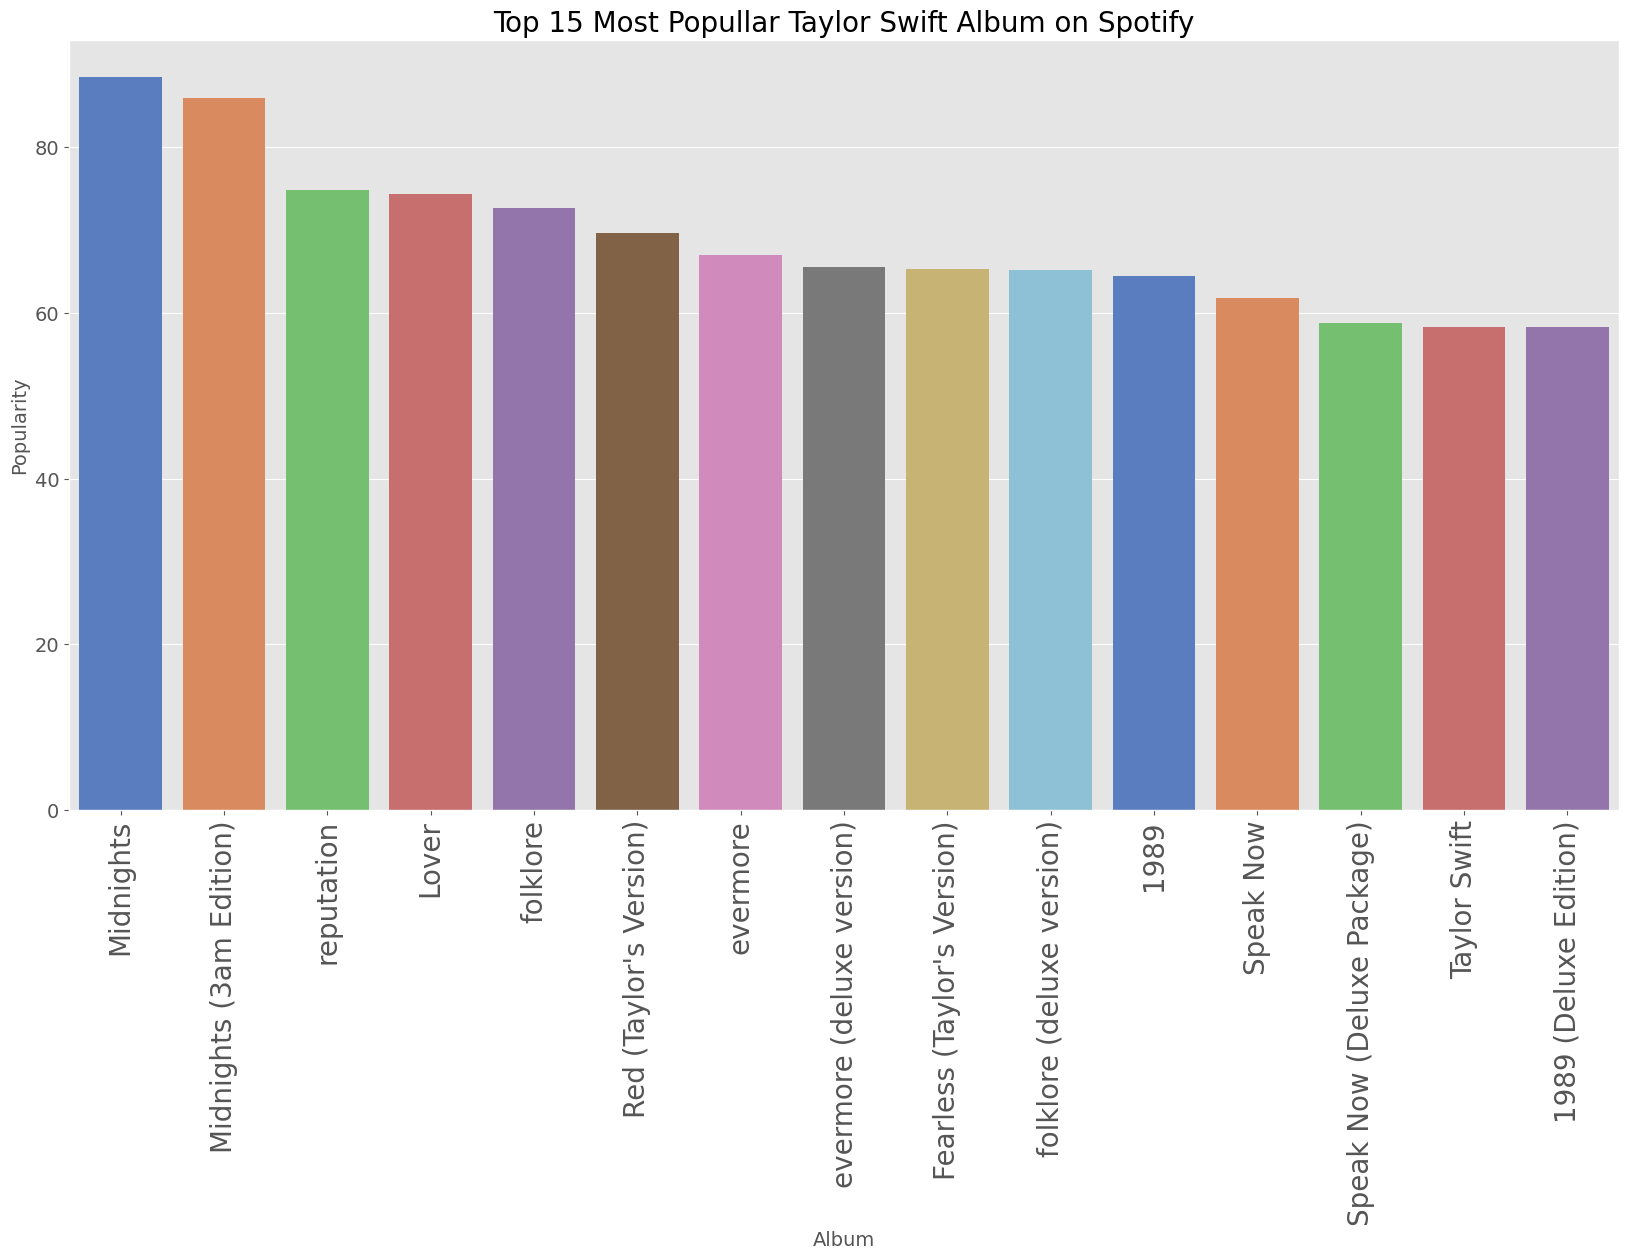

In [244]:
#Visualize her most popular album
plt.figure(figsize=(20,10))
sns.barplot(x=df_album_perf['album'].head(15), y=df_album_perf['popularity'],palette='muted')
plt.xlabel('Album', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=14)
plt.title('Top 15 Most Popullar Taylor Swift Album on Spotify', fontsize=20)
plt.show()


###### It shows that her most popular album is midnight and midnight 3am edition. Also notice that older albums (like 1989, and speak now are on the bottom of the list.

In [245]:
#Find correlation for her most popular albums
df_album_perf[["popularity","acousticness","danceability","energy","tempo","valence","instrumentalness"]].corr()

popularity  acousticness  danceability    energy     tempo  \
popularity          1.000000      0.464313      0.042775 -0.282319 -0.017164   
acousticness        0.464313      1.000000     -0.022485 -0.759819 -0.294052   
danceability        0.042775     -0.022485      1.000000 -0.211740 -0.423380   
energy             -0.282319     -0.759819     -0.211740  1.000000  0.575237   
tempo              -0.017164     -0.294052     -0.423380  0.575237  1.000000   
valence            -0.111615      0.132923      0.280995  0.042987 -0.274824   
instrumentalness   -0.769217     -0.517723     -0.057557  0.268927  0.074117   

                   valence  instrumentalness  
popularity       -0.111615         -0.769217  
acousticness      0.132923         -0.517723  
danceability      0.280995         -0.057557  
energy            0.042987          0.268927  
tempo            -0.274824          0.074117  
valence           1.000000         -0.191047  
instrumentalness -0.191047          1.000000

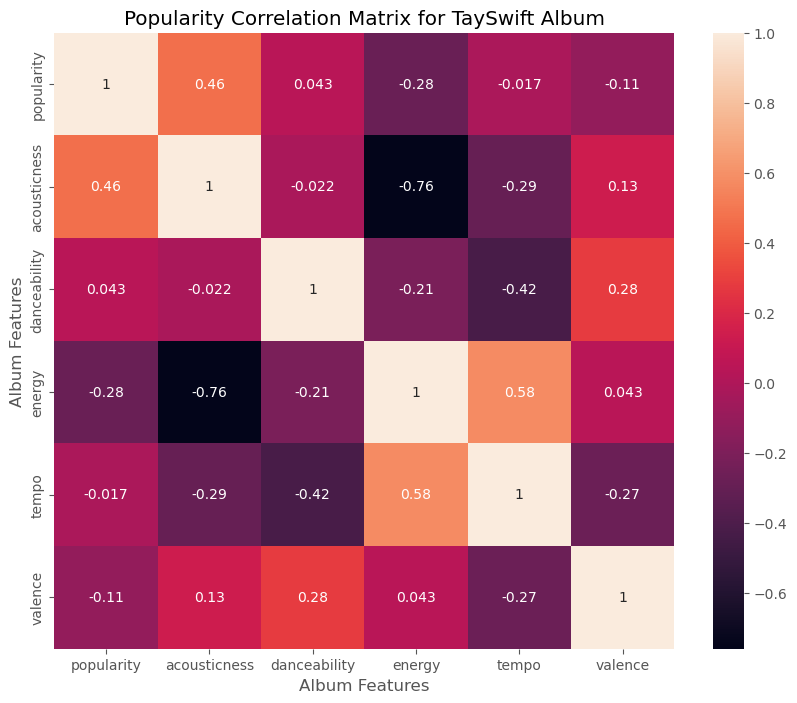

In [261]:
#create correlation heatmap from all albums
correlation_matrix = df_album_perf[["popularity","acousticness","danceability","energy","tempo","valence"]].corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Popularity Correlation Matrix for TaySwift Album')
plt.xlabel('Album Features')
plt.ylabel('Album Features')

plt.show()

<AxesSubplot:xlabel='popularity', ylabel='acousticness'>

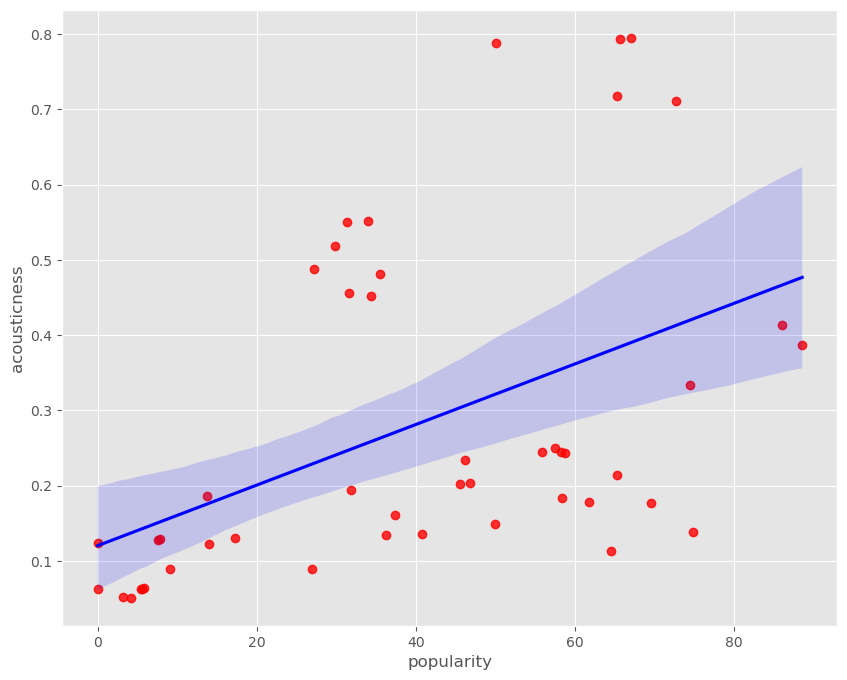

In [208]:
#chart for acousticness 

#Scatter plot with budget vs gross

sns.regplot(x='popularity', y='acousticness', data=df_album_perf, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [209]:
#turned out, album wise, acousticness has the highest positive correlation with popularity. And instrumentalness had the highest negative correlation

#let's check which albums are the highest in terms of acousticness

print(df_album_perf.index)

Index(['Midnights', 'Midnights (3am Edition)', 'reputation', 'Lover',
       'folklore', 'Red (Taylor's Version)', 'evermore',
       'evermore (deluxe version)', 'Fearless (Taylor's Version)',
       'folklore (deluxe version)', '1989', 'Speak Now',
       'Speak Now (Deluxe Package)', 'Taylor Swift', '1989 (Deluxe Edition)',
       'Speak Now (Deluxe Edition)', '1989 (Deluxe)',
       'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
       'Red (Deluxe Edition)', 'Fearless (Platinum Edition)',
       'Speak Now World Tour Live', 'Fearless Platinum Edition', 'Fearless',
       'reputation Stadium Tour Surprise Song Playlist',
       'Fearless (International Version)',
       'Fearless (Big Machine Radio Release Special)',
       'Red (Big Machine Radio Release Special)',
       'Live From Clear Channel Stripped 2008', 'Speak Now (US Version)',
       '1989 (Big Machine Radio Release Special)',
       'reputation (Big Machine Radio Release Special)

In [210]:
# Convert the index back to a regular column
df_album_perf = df_album_perf.reset_index()

# Print the resulting DataFrame
print(df_album_perf)


                                                album  songs  popularity  \
0                                           Midnights     13   88.538462   
1                             Midnights (3am Edition)     20   86.000000   
2                                          reputation     15   74.866667   
3                                               Lover     18   74.388889   
4                                            folklore     16   72.687500   
5                              Red (Taylor's Version)     30   69.600000   
6                                            evermore     15   67.000000   
7                           evermore (deluxe version)     17   65.588235   
8                         Fearless (Taylor's Version)     26   65.307692   
9                           folklore (deluxe version)     17   65.235294   
10                                               1989     13   64.461538   
11                                          Speak Now     15   61.800000   
12          

In [211]:
# Select the album and acousticness columns
df_selected = df_album_perf[['album', 'acousticness']]

df_selected.sort_values(by=['acousticness'], ascending=False)



album  acousticness
6                                            evermore      0.795333
7                           evermore (deluxe version)      0.794118
17  folklore: the long pond studio sessions (from ...      0.787971
9                           folklore (deluxe version)      0.717588
4                                            folklore      0.710813
27              Live From Clear Channel Stripped 2008      0.551250
30     reputation (Big Machine Radio Release Special)      0.550959
31   Taylor Swift (Big Machine Radio Release Special)      0.519081
32      Speak Now (Big Machine Radio Release Special)      0.487563
25       Fearless (Big Machine Radio Release Special)      0.481752
29           1989 (Big Machine Radio Release Special)      0.456532
26            Red (Big Machine Radio Release Special)      0.451871
1                             Midnights (3am Edition)      0.413220
0                                           Midnights      0.387423
3                                               Lover      0.333743
15                         Speak Now (Deluxe Edition)      0.249275
16                                      1989 (Deluxe)      0.244620
14                              1989 (Deluxe Edition)      0.244620
12                         Speak Now (Deluxe Package)      0.243507
20                          Speak Now World Tour Live      0.233802
8                         Fearless (Taylor's Version)      0.214061
19                        Fearless (Platinum Edition)      0.202937
21                          Fearless Platinum Edition      0.202448
28                             Speak Now (US Version)      0.193474
36                       Speak Now (Japanese Version)      0.186616
13                                       Taylor Swift      0.182995
11                                          Speak Now      0.178029
5                              Red (Taylor's Version)      0.176866
23     reputation Stadium Tour Surprise Song Playlist      0.160402
18                               Red (Deluxe Edition)      0.148799
2                                          reputation      0.138515
22                                           Fearless      0.135173
24                   Fearless (International Version)      0.134174
34                   Taylor Swift Karaoke: reputation      0.130046
38                        Speak Now (Karaoke Version)      0.128911
39                    Taylor Swift Karaoke: Speak Now      0.127509
45        Taylor Swift Karaoke: 1989 (Deluxe Edition)      0.124112
35                Taylor Swift Karaoke: 1989 (Deluxe)      0.122044
10                                               1989      0.113095
37                         Taylor Swift Karaoke: 1989      0.089659
33                                                Red      0.089316
40                          Taylor Swift Karaoke: Red      0.063896
41                         Fearless (Karaoke Version)      0.062984
46                              Red (Karaoke Version)      0.062515
42                                   Fearless Karaoke      0.062503
44                     Taylor Swift (Karaoke Version)      0.052252
43                               Taylor Swift Karaoke      0.050871

### Finding what's the biggest score for each of her album:

In [251]:
#select columns that are related to features --> acousticness, danceability, energy, and valence
album_feature = df_album_perf[['album', 'acousticness', 'danceability', 'energy', 'valence']]


def find_highest_score(row):
    album = row['album']
    scores = [row['acousticness'], row['valence'], row['danceability'], row['energy']]
    highest_score = max(scores)
    if highest_score == row['acousticness']:
        highest_score_feature = 'acousticness'
    elif highest_score == row['valence']:
        highest_score_feature = 'valence'
    elif highest_score == row['danceability']:
        highest_score_feature = 'danceability'
    elif highest_score == row['energy']:
        highest_score_feature = 'energy'
    elif highest_score == row['instrumentalness']:
        highest_score_feature = 'instrumentalness'
    # Print the results
    #print(f"For the album {album}, the highest score is {highest_score} in the {highest_score_feature} feature")
    # Return the results as a dictionary
    return  highest_score_feature

# Use the .loc[] indexer to modify the 'highest_score_feature' column directly, got error message if i directly use df["column"]
album_feature.loc[:, 'highest_score_feature'] = album_feature.apply(find_highest_score, axis=1)
album_feature




/var/folders/z1/4pvg1lxs0k51c3wb3733n6300000gp/T/ipykernel_76531/1994610942.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  album_feature.loc[:, 'highest_score_feature'] = album_feature.apply(find_highest_score, axis=1)


album  acousticness  \
0                                           Midnights      0.387423   
1                             Midnights (3am Edition)      0.413220   
2                                          reputation      0.138515   
3                                               Lover      0.333743   
4                                            folklore      0.710813   
5                              Red (Taylor's Version)      0.176866   
6                                            evermore      0.795333   
7                           evermore (deluxe version)      0.794118   
8                         Fearless (Taylor's Version)      0.214061   
9                           folklore (deluxe version)      0.717588   
10                                               1989      0.113095   
11                                          Speak Now      0.178029   
12                         Speak Now (Deluxe Package)      0.243507   
13                                       Taylor Swift      0.182995   
14                              1989 (Deluxe Edition)      0.244620   
15                         Speak Now (Deluxe Edition)      0.249275   
16                                      1989 (Deluxe)      0.244620   
17  folklore: the long pond studio sessions (from ...      0.787971   
18                               Red (Deluxe Edition)      0.148799   
19                        Fearless (Platinum Edition)      0.202937   
20                          Speak Now World Tour Live      0.233802   
21                          Fearless Platinum Edition      0.202448   
22                                           Fearless      0.135173   
23     reputation Stadium Tour Surprise Song Playlist      0.160402   
24                   Fearless (International Version)      0.134174   
25       Fearless (Big Machine Radio Release Special)      0.481752   
26            Red (Big Machine Radio Release Special)      0.451871   
27              Live From Clear Channel Stripped 2008      0.551250   
28                             Speak Now (US Version)      0.193474   
29           1989 (Big Machine Radio Release Special)      0.456532   
30     reputation (Big Machine Radio Release Special)      0.550959   
31   Taylor Swift (Big Machine Radio Release Special)      0.519081   
32      Speak Now (Big Machine Radio Release Special)      0.487563   
33                                                Red      0.089316   
34                   Taylor Swift Karaoke: reputation      0.130046   
35                Taylor Swift Karaoke: 1989 (Deluxe)      0.122044   
36                       Speak Now (Japanese Version)      0.186616   
37                         Taylor Swift Karaoke: 1989      0.089659   
38                        Speak Now (Karaoke Version)      0.128911   
39                    Taylor Swift Karaoke: Speak Now      0.127509   
40                          Taylor Swift Karaoke: Red      0.063896   
41                         Fearless (Karaoke Version)      0.062984   
42                                   Fearless Karaoke      0.062503   
43                               Taylor Swift Karaoke      0.050871   
44                     Taylor Swift (Karaoke Version)      0.052252   
45        Taylor Swift Karaoke: 1989 (Deluxe Edition)      0.124112   
46                              Red (Karaoke Version)      0.062515   

    danceability    energy   valence highest_score_feature  
0       0.638538  0.410154  0.223531          danceability  
1       0.626650  0.451150  0.282530          danceability  
2       0.657933  0.582867  0.293400          danceability  
3       0.658222  0.545222  0.481444          danceability  
4       0.567875  0.425063  0.381250          acousticness  
5       0.576967  0.586900  0.424600                energy  
6       0.518867  0.491333  0.420600          acousticness  
7       0.526824  0.494059  0.433529          acousticness  
8       0.551038  0.639115  0.421923                energy  
9       0.541941  0.415824  0

## Diving Deep for Her Songs

In [170]:
#Sort the album based on release date and track number
df_clean.sort_values(by=['release_date', 'track_number','album'], ascending=[False, True, True])



Unnamed: 0                                               name  \
0              0                                      Lavender Haze   
1              1                                             Maroon   
2              2                                          Anti-Hero   
3              3             Snow On The Beach (feat. Lana Del Rey)   
4              4                            You're On Your Own, Kid   
5              5                                      Midnight Rain   
6              6                                       Question...?   
7              7                                     Vigilante Shit   
8              8                                          Bejeweled   
9              9                                          Labyrinth   
10            10                                              Karma   
11            11                                      Sweet Nothing   
12            12                                         Mastermind   
13            13                                      The Great War   
14            14                          Bigger Than The Whole Sky   
15            15                                              Paris   
16            16                                    High Infidelity   
17            17                                             Glitch   
18            18                      Would've, Could've, Should've   
19            19                                        Dear Reader   
40            40                                      Lavender Haze   
41            41                                             Maroon   
42            42                                          Anti-Hero   
43            43             Snow On The Beach (feat. Lana Del Rey)   
44            44                            You're On Your Own, Kid   
45            45                                      Midnight Rain   
46            46                                       Question...?   
47            47                                     Vigilante Shit   
48            48                                          Bejeweled   
49            49                                          Labyrinth   
50            50                                              Karma   
51            51                                      Sweet Nothing   
52            52                                         Mastermind   
66            66                  State Of Grace (Taylor's Version)   
67            67                             Red (Taylor's Version)   
68            68                     Treacherous (Taylor's Version)   
69            69         I Knew You Were Trouble (Taylor's Version)   
70            70                    All Too Well (Taylor's Version)   
71            71                              22 (Taylor's Version)   
72            72                     I Almost Do (Taylor's Version)   
73            73  We Are Never Ever Getting Back Together (Taylo...   
74            74                  Stay Stay Stay (Taylor's Version)   
75            75  The Last Time (feat. Gary Lightbody of Snow Pa...   
76            76                     Holy Ground (Taylor's Version)   
77            77            Sad Beautiful Tragic (Taylor's Version)   
78            78                   The Lucky One (Taylor's Version)   
79            79  Everything Has Changed (feat. Ed Sheeran) (Tay...   
80            80                       Starlight (Taylor's Version)   
81            81                     Begin Again (Taylor's Version)   
82            82               The Moment I Knew (Taylor's Version)   
83            83             Come Back...Be Here (Taylor's Version)   
84            84                    Girl At Home (Taylor's Version)   
85            85  State Of Grace (Acoustic Version) (Taylor's Ve...   
86            86                           Ronan (Taylor's Version)   
87            87     Better Man (Taylor's Version) (From The Vault)   
88            88  Nothing New 

In [178]:

#List of all main albums, taylor's version, and deluxe album only
album_list = ["Midnights", "Midnights (3am Edition)", "reputation", "Lover",
       "folklore", "Red (Taylor's Version)", 'evermore',
       'evermore (deluxe version)', "Fearless (Taylor's Version)",
       'folklore (deluxe version)', '1989', 'Speak Now',
       'Speak Now (Deluxe Package)', 'Taylor Swift', 
       '1989 (Deluxe)',
       'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
       'Red (Deluxe Edition)']


df_clean_selected = df_clean[df_clean["album"].isin(album_list)]
df_clean_selected.sort_values(by=['release_date', 'track_number','album'], ascending=[False, True, True])


Unnamed: 0                                               name  \
0              0                                      Lavender Haze   
1              1                                             Maroon   
2              2                                          Anti-Hero   
3              3             Snow On The Beach (feat. Lana Del Rey)   
4              4                            You're On Your Own, Kid   
5              5                                      Midnight Rain   
6              6                                       Question...?   
7              7                                     Vigilante Shit   
8              8                                          Bejeweled   
9              9                                          Labyrinth   
10            10                                              Karma   
11            11                                      Sweet Nothing   
12            12                                         Mastermind   
13            13                                      The Great War   
14            14                          Bigger Than The Whole Sky   
15            15                                              Paris   
16            16                                    High Infidelity   
17            17                                             Glitch   
18            18                      Would've, Could've, Should've   
19            19                                        Dear Reader   
40            40                                      Lavender Haze   
41            41                                             Maroon   
42            42                                          Anti-Hero   
43            43             Snow On The Beach (feat. Lana Del Rey)   
44            44                            You're On Your Own, Kid   
45            45                                      Midnight Rain   
46            46                                       Question...?   
47            47                                     Vigilante Shit   
48            48                                          Bejeweled   
49            49                                          Labyrinth   
50            50                                              Karma   
51            51                                      Sweet Nothing   
52            52                                         Mastermind   
66            66                  State Of Grace (Taylor's Version)   
67            67                             Red (Taylor's Version)   
68            68                     Treacherous (Taylor's Version)   
69            69         I Knew You Were Trouble (Taylor's Version)   
70            70                    All Too Well (Taylor's Version)   
71            71                              22 (Taylor's Version)   
72            72                     I Almost Do (Taylor's Version)   
73            73  We Are Never Ever Getting Back Together (Taylo...   
74            74                  Stay Stay Stay (Taylor's Version)   
75            75  The Last Time (feat. Gary Lightbody of Snow Pa...   
76            76                     Holy Ground (Taylor's Version)   
77            77            Sad Beautiful Tragic (Taylor's Version)   
78            78                   The Lucky One (Taylor's Version)   
79            79  Everything Has Changed (feat. Ed Sheeran) (Tay...   
80            80                       Starlight (Taylor's Version)   
81            81                     Begin Again (Taylor's Version)   
82            82               The Moment I Knew (Taylor's Version)   
83            83             Come Back...Be Here (Taylor's Version)   
84            84                    Girl At Home (Taylor's Version)   
85            85  State Of Grace (Acoustic Version) (Taylor's Ve...   
86            86                           Ronan (Taylor's Version)   
87            87     Better Man (Taylor's Version) (From The Vault)   
88            88  Nothing New 

In [235]:
#Just want to know the average popularity of her songs for the cleaned version dataframe

df_clean_selected.describe()

Unnamed: 0  track_number  acousticness  danceability      energy  \
count   319.000000    319.000000    319.000000    319.000000  319.000000   
mean    404.445141     10.034483      0.391800      0.583320    0.546890   
std     333.384374      6.170181      0.350230      0.115122    0.193424   
min       3.000000      1.000000      0.000191      0.292000    0.118000   
25%     145.500000      5.000000      0.048350      0.516500    0.387000   
50%     306.000000     10.000000      0.271000      0.595000    0.557000   
75%     676.500000     14.000000      0.759000      0.652500    0.701000   
max    1206.000000     30.000000      0.971000      0.897000    0.944000   

       instrumentalness    liveness    loudness  speechiness       tempo  \
count        319.000000  319.000000  319.000000   319.000000  319.000000   
mean           0.005282    0.137578   -8.005354     0.054738  122.686853   
std            0.038515    0.083092    2.924312     0.052717   30.376743   
min            0.000000    0.033500  -15.910000     0.023100   68.097000   
25%            0.000000    0.093100  -10.281500     0.030550   96.000000   
50%            0.000005    0.113000   -7.704000     0.037600  119.988000   
75%            0.000077    0.144000   -5.800500     0.054950  143.976000   
max            0.488000    0.791000   -2.098000     0.519000  208.918000   

          valence  popularity    duration_ms  
count  319.000000  319.000000     319.000000  
mean     0.398141   65.601881  238920.429467  
std      0.194496   11.527440   44785.780994  
min      0.037400   40.000000  148781.000000  
25%      0.244000   58.000000  210556.000000  
50%      0.397000   65.000000  232346.000000  
75%      0.533500   73.000000  257773.000000  
max      0.943000   97.000000  613026.000000

In [237]:
df_clean_selected.shape

(319, 18)

## Analyzing Album with The Selected Albums datasets

In [247]:
#check the average popularity, acousticness, danceability, energy, instrumentalness, and liveness of each album

album_performance_selected= df_clean_selected.groupby(
        "album").agg(
        {
            "name": "count",
            "popularity":"mean",
            "acousticness":"mean",
            "danceability": "mean",
            "energy": "mean",
            "tempo": "mean",
            "valence": "mean",
            "liveness": "mean",
            "speechiness": "mean",
            "instrumentalness": "mean",
            "duration_ms": "mean"
            
        }).rename(columns={"name": "songs"})

# df_album_perf = album_performance.reset_index()

# Select the album and acousticness columns
df_album_perf_s = album_performance_selected.sort_values(by=["popularity"], inplace=False, ascending=False)
pd.DataFrame(df_album_perf_s)


songs  popularity  \
album                                                                   
Midnights                                              13   88.538462   
Midnights (3am Edition)                                17   85.764706   
reputation                                             15   74.866667   
Lover                                                  18   74.388889   
folklore                                               16   72.687500   
Red (Taylor's Version)                                 30   69.600000   
evermore                                               15   67.000000   
1989 (Deluxe)                                          16   66.375000   
evermore (deluxe version)                              17   65.588235   
Fearless (Taylor's Version)                            26   65.307692   
folklore (deluxe version)                              17   65.235294   
1989                                                   13   64.461538   
Speak Now                                              15   61.800000   
Speak Now (Deluxe Package)                             20   58.750000   
Taylor Swift                                           15   58.333333   
folklore: the long pond studio sessions (from t...     34   50.088235   
Red (Deluxe Edition)                                   22   49.909091   

                                                    acousticness  \
album                                                              
Midnights                                               0.387423   
Midnights (3am Edition)                                 0.462829   
reputation                                              0.138515   
Lover                                                   0.333743   
folklore                                                0.710813   
Red (Taylor's Version)                                  0.176866   
evermore                                                0.795333   
1989 (Deluxe)                                           0.143798   
evermore (deluxe version)                               0.794118   
Fearless (Taylor's Version)                             0.214061   
folklore (deluxe version)                               0.717588   
1989                                                    0.113095   
Speak Now                                               0.178029   
Speak Now (Deluxe Package)                              0.243507   
Taylor Swift                                            0.182995   
folklore: the long pond studio sessions (from t...      0.787971   
Red (Deluxe Edition)                                    0.148799   

                                                    danceability    energy  \
album                                                                        
Midnights                                               0.638538  0.410154   
Midnights (3am Edition)                                 0.617765  0.445118   
reputation                                              0.657933  0.582867   
Lover                                                   0.658222  0.545222   
folklore                                                0.567875  0.425063   
Red (Taylor's Version)                                  0.576967  0.586900   
evermore                                                0.518867  0.491333   
1989 (Deluxe)                                           0.623938  0.697063   
evermore (deluxe version)                               0.526824  0.494059   
Fearless (Taylor's Version)                             0.551038  0.639115   
folklore (deluxe version)                               0.541941  0.415824   
1989                                                    0.649385  0.698923   
Speak Now                                               0.559933  0.669800   
Speak Now (Deluxe Package)                              0.559900  0.648800   
Taylor Swift                                            0.545267  0.664267   
folklore: the long pond studio sessions (from

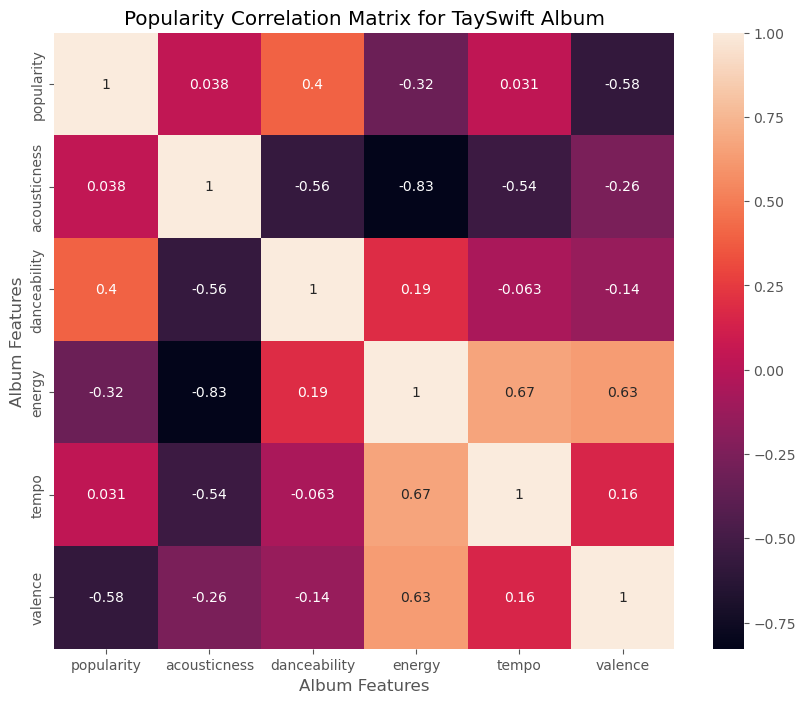

In [249]:
#create correlation heatmap, this is from selected albums only
correlation_matrix = df_album_perf_s[["popularity","acousticness","danceability","energy","tempo","valence"]].corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Popularity Correlation Matrix for TaySwift Album')
plt.xlabel('Album Features')
plt.ylabel('Album Features')

plt.show()

<AxesSubplot:xlabel='popularity', ylabel='danceability'>

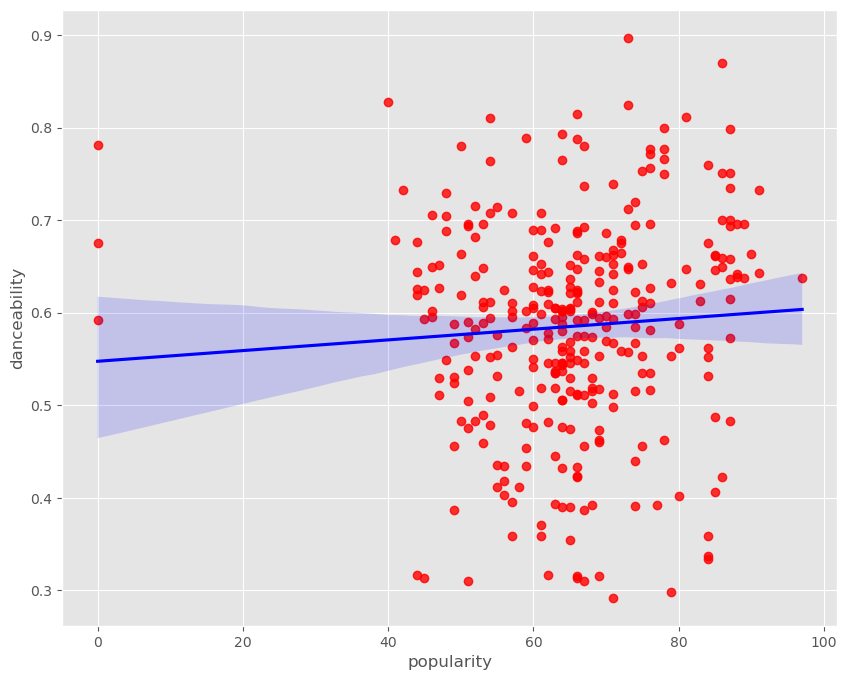

In [180]:
#check song popularity correlation to danceability
#Hypothesis, album with more danceability feature are the most popular ones
sns.regplot(x='popularity', y='danceability', data=df_clean_selected, scatter_kws={"color":"red"}, line_kws={"color":"blue"})



In [192]:
#removing outliers
outlier_column = df_clean_selected['popularity']
outlier_rows = df_clean_selected[outlier_column.isin([0])]
outlier_rows = outlier_rows.reset_index(drop=True) #reset the index (row number)

In [337]:
#removing outliers
# Select rows where either 'popularity' or 'danceability' are 0
outlier_rows = df_clean[(df_clean['popularity'] == 0) | (df_clean['danceability'] == 0)]

# Drop the selected rows from df_clean
df_clean = df_clean.drop(df_clean.index[outlier_rows.index])

df_clean

Unnamed: 0                                               name  \
398          398                                   ...Ready For It?   
414          414                                   ...Ready For It?   
383          383                 ...Ready For It? - Karaoke Version   
759          759                                                 22   
709          709                                                 22   
693          693                                                 22   
451          451                                                 22   
71            71                              22 (Taylor's Version)   
758          758                                    22 - Commentary   
817          817           22 - Instrumental With Background Vocals   
801          801                               22 - Karaoke Version   
785          785                               22 - Karaoke Version   
1205        1205                             A Perfectly Good Heart   
1234        1234                             A Perfectly Good Heart   
1233        1233                A Perfectly Good Heart - Commentary   
1250        1250  A Perfectly Good Heart - Instrumental w/ BG vo...   
1264        1264  A Perfectly Good Heart - Instrumental w/ BG vo...   
1214        1214                              A Place In This World   
1213        1213                 A Place In This World - Commentary   
1240        1240  A Place In This World - Instrumental w/ BG vocals   
1254        1254  A Place In This World - Instrumental w/ BG vocals   
1195        1195                              A Place in this World   
472          472                              A Place in this World   
379          379                                          Afterglow   
708          708                                       All Too Well   
692          692                                       All Too Well   
757          757                                       All Too Well   
444          444                                       All Too Well   
95            95  All Too Well (10 Minute Version) (Taylor's Ver...   
70            70                    All Too Well (Taylor's Version)   
756          756                          All Too Well - Commentary   
816          816  All Too Well - Instrumental With Background Vo...   
800          800                     All Too Well - Karaoke Version   
784          784                     All Too Well - Karaoke Version   
510          510                         All You Had To Do Was Stay   
673          673                         All You Had To Do Was Stay   
626          626                         All You Had To Do Was Stay   
541          541                         All You Had To Do Was Stay   
540          540            All You Had To Do Was Stay - Commentary   
494          494       All You Had To Do Was Stay - Karaoke Version   
594          594       All You Had To Do Was Stay - Karaoke Version   
578          578       All You Had To Do Was Stay - Karaoke Version   
42            42                                          Anti-Hero   
2              2                                          Anti-Hero   
464          464                                               Babe   
89            89           Babe (Taylor's Version) (From The Vault)   
980          980                                   Back To December   
876          876                                   Back To December   
946          946                                   Back To December   
966          966                                   Back To December   
893          893                                   Back To December   
830          830                                   Back To December   
995          995                        Back To December - Acoustic   
961          961                        Back To December - Acoustic   
892          892                      Back To December - Commentary   
918          918  Back To Dece

<AxesSubplot:xlabel='popularity', ylabel='danceability'>

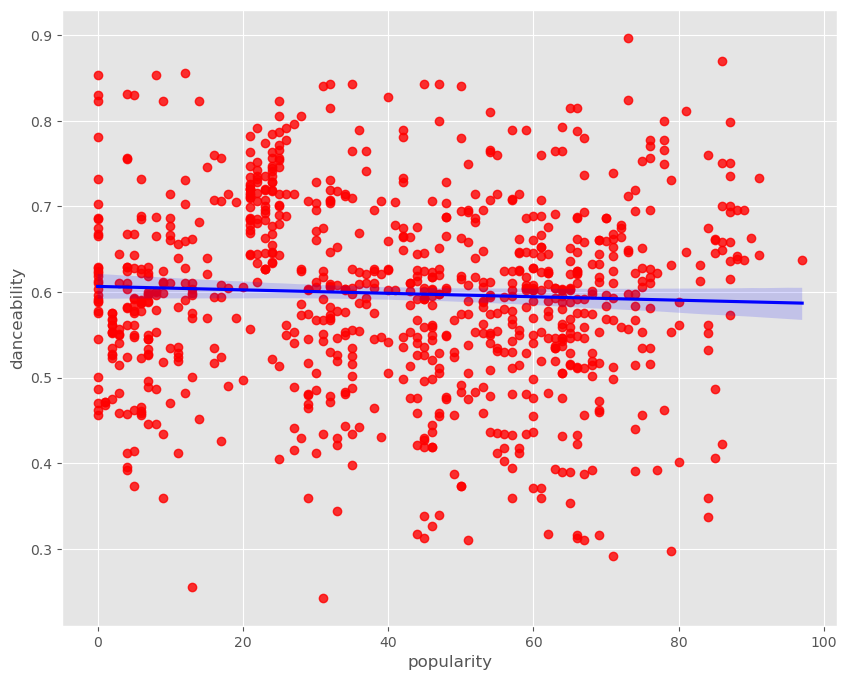

In [338]:
sns.regplot(x='popularity', y='danceability', data=df_clean, scatter_kws={"color":"red"}, line_kws={"color":"blue"})



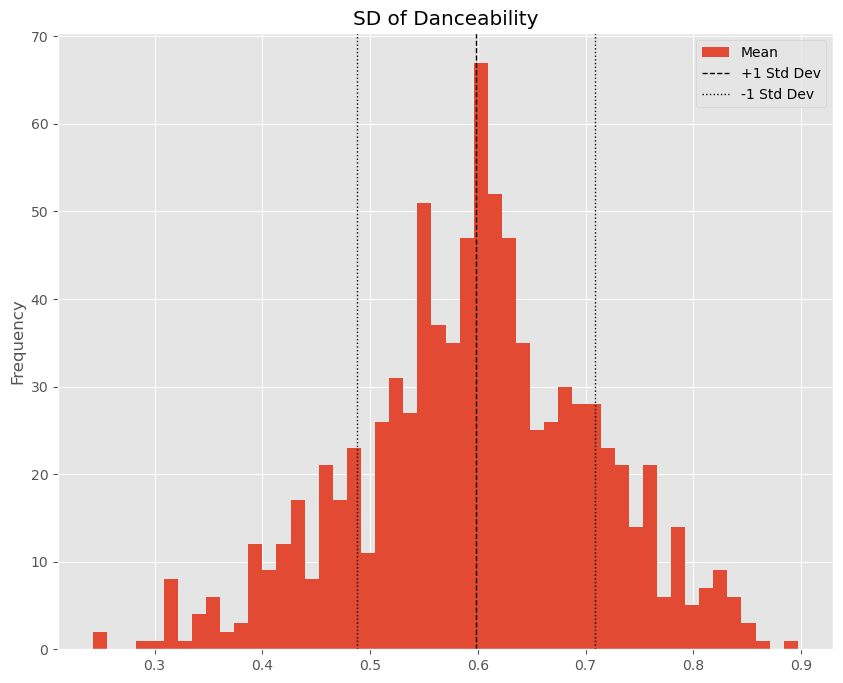

In [343]:

# Calculate the standard deviation of danceability
std = df_clean['danceability'].std()

# Plot a histogram of the variable
df_clean['danceability'].plot.hist(bins=50)

# Add vertical lines to indicate the mean and +/- 1 standard deviation
plt.axvline(df_clean['danceability'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_clean['danceability'].mean() + std, color='k', linestyle='dotted', linewidth=1)
plt.axvline(df_clean['danceability'].mean() - std, color='k', linestyle='dotted', linewidth=1)

# Add a legend and show the plot
plt.title("SD of Danceability")
plt.legend(['Mean', '+1 Std Dev', '-1 Std Dev'])
plt.show()


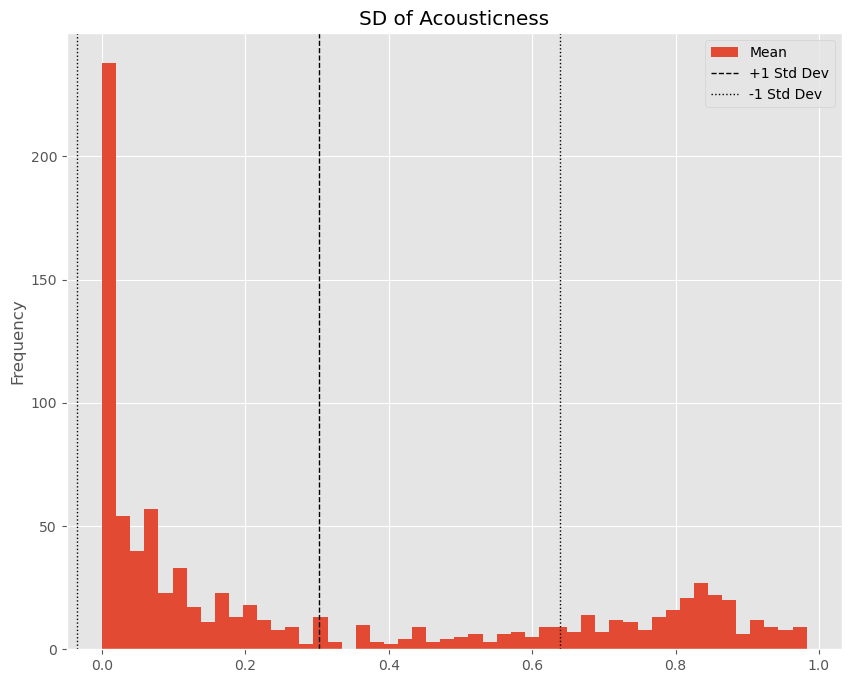

In [340]:

# Calculate the standard deviation of acousticness
std = df_clean['acousticness'].std()

# Plot a histogram of the variable
df_clean['acousticness'].plot.hist(bins=50)

# Add vertical lines to indicate the mean and +/- 1 standard deviation
plt.axvline(df_clean['acousticness'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_clean['acousticness'].mean() + std, color='k', linestyle='dotted', linewidth=1)
plt.axvline(df_clean['acousticness'].mean() - std, color='k', linestyle='dotted', linewidth=1)

# Add a legend and show the plot
plt.legend(['Mean', '+1 Std Dev', '-1 Std Dev'])
plt.title("SD of Acousticness")
plt.show()


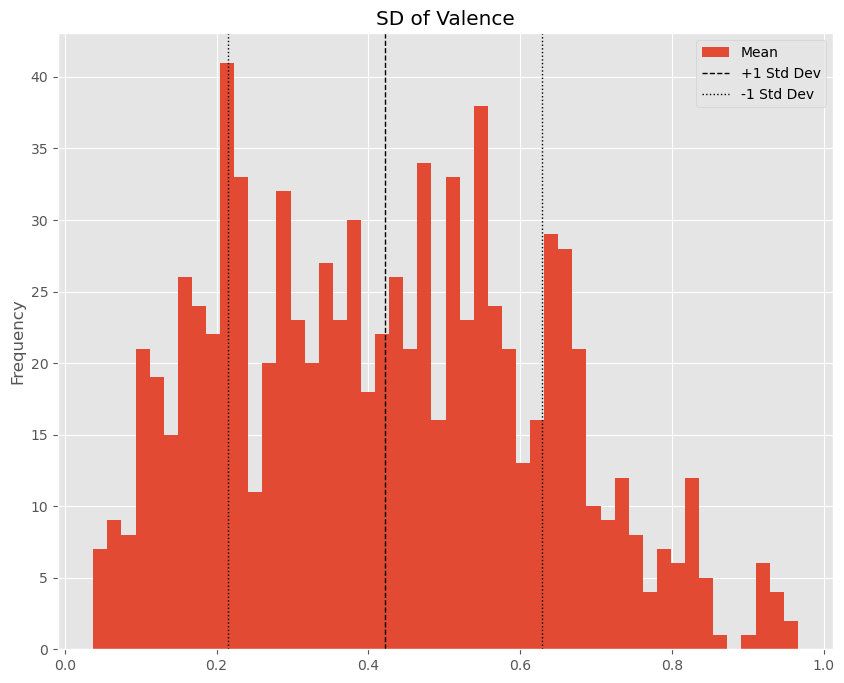

In [342]:

# Calculate the standard deviation of valence
std = df_clean['valence'].std()

# Plot a histogram of the variable
df_clean['valence'].plot.hist(bins=50)

# Add vertical lines to indicate the mean and +/- 1 standard deviation
plt.axvline(df_clean['valence'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_clean['valence'].mean() + std, color='k', linestyle='dotted', linewidth=1)
plt.axvline(df_clean['valence'].mean() - std, color='k', linestyle='dotted', linewidth=1)

# Add a legend and show the plot
plt.legend(['Mean', '+1 Std Dev', '-1 Std Dev'])
plt.title("SD of Valence")
plt.show()


In [308]:
#Check correlation in song levels
df_clean_selected[
    ['popularity','valence','acousticness','energy','instrumentalness','liveness','loudness','tempo','valence','danceability']].corr(method='pearson')
    
#it seems there is no feature that correlates at all with popularity


popularity   valence  acousticness    energy  \
popularity          1.000000 -0.066581     -0.122687  0.005293   
valence            -0.066581  1.000000     -0.249830  0.538871   
acousticness       -0.122687 -0.249830      1.000000 -0.723882   
energy              0.005293  0.538871     -0.723882  1.000000   
instrumentalness    0.112438 -0.077978      0.137521 -0.073153   
liveness            0.056971  0.011055     -0.192938  0.225435   
loudness           -0.085383  0.383262     -0.763186  0.801394   
tempo              -0.030276  0.068821     -0.097670  0.152777   
valence            -0.066581  1.000000     -0.249830  0.538871   
danceability        0.108780  0.314138     -0.228643  0.131173   

                  instrumentalness  liveness  loudness     tempo   valence  \
popularity                0.112438  0.056971 -0.085383 -0.030276 -0.066581   
valence                  -0.077978  0.011055  0.383262  0.068821  1.000000   
acousticness              0.137521 -0.192938 -0.763186 -0.097670 -0.249830   
energy                   -0.073153  0.225435  0.801394  0.152777  0.538871   
instrumentalness          1.000000 -0.037228 -0.202234 -0.000291 -0.077978   
liveness                 -0.037228  1.000000  0.234302  0.005193  0.011055   
loudness                 -0.202234  0.234302  1.000000  0.109164  0.383262   
tempo                    -0.000291  0.005193  0.109164  1.000000  0.068821   
valence                  -0.077978  0.011055  0.383262  0.068821  1.000000   
danceability             -0.108067  0.024752  0.101678 -0.147833  0.314138   

                  danceability  
popularity            0.108780  
valence               0.314138  
acousticness         -0.228643  
energy                0.131173  
instrumentalness     -0.108067  
liveness              0.024752  
loudness              0.101678  
tempo                -0.147833  
valence               0.314138  
danceability          1.000000

##### Check correlation & statistical significance for selected albums only

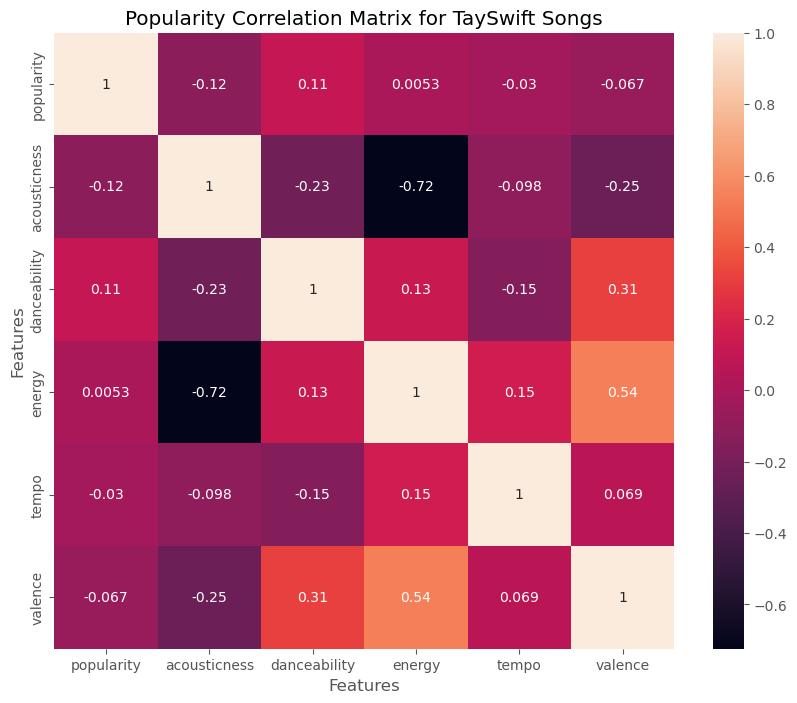

In [310]:
#create correlation heatmap for df_clean_selected

df_selected_features = df_clean_selected[
    ["popularity","acousticness","danceability","energy","tempo","valence"]]

correlation_matrix_songs = df_selected_features.corr(method='pearson')

sns.heatmap(correlation_matrix_songs, annot=True)

plt.title('Popularity Correlation Matrix for TaySwift Songs')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()


In [309]:

# Get the column names of the DataFrame
column_names = df_selected_features.columns

# Create an empty list to store the results
results_list_1 = []

# Loop through all pairs of columns
for i in range(len(column_names)):
    for j in range(i+1, len(column_names)):
        # Get the column names
        feature_1 = column_names[i]
        feature_2 = column_names[j]
        
        # Get the data for the two columns
        x = df_selected_features2[feature_1]
        y = df_selected_features2[feature_2]
        
        # Calculate the Pearson correlation coefficient and p-value
        r, p = scipy.stats.pearsonr(x, y)
        
        # Round the p-value to three decimal places
        p_rounded = round(p, 3)
        
        # Store the results in the list
        results_list_1.append({'Feature 1': feature_1, 'Feature 2': feature_2, 'Pearson Correlation': r, 'p-value': p_rounded})

# Create a DataFrame from the list of dictionaries
results_df1 = pd.DataFrame(results_list)

# Concatenate the DataFrames
results1 = pd.concat([results_df], ignore_index=True)

results1

Feature 1     Feature 2  Pearson Correlation  p-value
0     popularity  acousticness             0.128030    0.000
1     popularity  danceability            -0.047473    0.151
2     popularity        energy             0.004070    0.902
3     popularity         tempo             0.026941    0.415
4     popularity       valence            -0.068619    0.038
5   acousticness  danceability             0.086301    0.009
6   acousticness        energy            -0.740344    0.000
7   acousticness         tempo            -0.188719    0.000
8   acousticness       valence             0.005275    0.873
9   danceability        energy            -0.152792    0.000
10  danceability         tempo            -0.285152    0.000
11  danceability       valence             0.402459    0.000
12        energy         tempo             0.285965    0.000
13        energy       valence             0.226147    0.000
14         tempo       valence            -0.039426    0.233

##### Check the correlation and statistical siginificance for all songs & all  albums

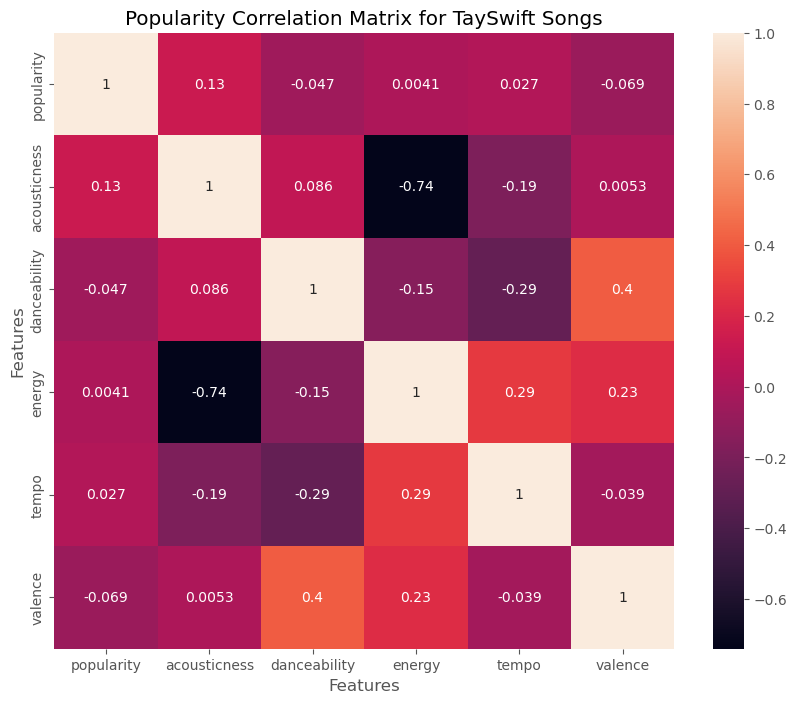

In [260]:
#create correlation heatmap for df_clean (not selected albums)

df_selected_features2 = df_clean[
    ["popularity","acousticness","danceability","energy","tempo","valence"]]

correlation_matrix_songs = df_selected_features2.corr(method='pearson')

sns.heatmap(correlation_matrix_songs, annot=True)

plt.title('Popularity Correlation Matrix for TaySwift Songs')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()


In [315]:

# Get the column names of the DataFrame
column_names = df_selected_features2.columns

# Create an empty list to store the results
results_list = []

# Loop through all pairs of columns
for i in range(len(column_names)):
    for j in range(i+1, len(column_names)):
        # Get the column names
        feature_1 = column_names[i]
        feature_2 = column_names[j]
        
        # Get the data for the two columns
        x = df_selected_features2[feature_1]
        y = df_selected_features2[feature_2]
        
        # Calculate the Pearson correlation coefficient and p-value
        r, p = scipy.stats.pearsonr(x, y)
        
        # Round the p-value to three decimal places
        p_rounded = round(p, 3)
        
        # Store the results in the list
        results_list.append({'Feature 1': feature_1, 'Feature 2': feature_2, 'Pearson Correlation': r, 'p-value': p_rounded})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Concatenate the DataFrames
results = pd.concat([results_df], ignore_index=True)

#Add significance info
def is_significant(row):
    if row['p-value'] < 0.05:
        return 'Significant'
    else:
        return 'Not Significant'

# Use the apply() method to apply the custom function to each row of the results DataFrame
results['Significance'] = results.apply(is_significant, axis=1)


results

Feature 1     Feature 2  Pearson Correlation  p-value     Significance
0     popularity  acousticness             0.128030    0.000      Significant
1     popularity  danceability            -0.047473    0.151  Not Significant
2     popularity        energy             0.004070    0.902  Not Significant
3     popularity         tempo             0.026941    0.415  Not Significant
4     popularity       valence            -0.068619    0.038      Significant
5   acousticness  danceability             0.086301    0.009      Significant
6   acousticness        energy            -0.740344    0.000      Significant
7   acousticness         tempo            -0.188719    0.000      Significant
8   acousticness       valence             0.005275    0.873  Not Significant
9   danceability        energy            -0.152792    0.000      Significant
10  danceability         tempo            -0.285152    0.000      Significant
11  danceability       valence             0.402459    0.000      Significant
12        energy         tempo             0.285965    0.000      Significant
13        energy       valence             0.226147    0.000      Significant
14         tempo       valence            -0.039426    0.233  Not Significant

In [275]:
#TaySwift most popular songs

df_clean_selected["rank"] = df_clean_selected["popularity"].rank(method="dense", ascending=False)

# Sort the dataframe by popularity in descending order
df_sorted = df_clean_selected.sort_values(by='popularity', ascending=False)

# Display the resulting dataframe
df_sorted[["name","popularity","album","valence","danceability","rank"]]

name  popularity  \
42                                            Anti-Hero          97   
45                                        Midnight Rain          91   
40                                        Lavender Haze          91   
43               Snow On The Beach (feat. Lana Del Rey)          90   
44                              You're On Your Own, Kid          89   
41                                               Maroon          89   
48                                            Bejeweled          88   
50                                                Karma          88   
4                               You're On Your Own, Kid          87   
13                                        The Great War          87   
5                                         Midnight Rain          87   
46                                         Question...?          87   
18                        Would've, Could've, Should've          87   
401                                      Don’t Blame Me          87   
47                                       Vigilante Shit          87   
8                                             Bejeweled          87   
3                Snow On The Beach (feat. Lana Del Rey)          86   
14                            Bigger Than The Whole Sky          86   
10                                                Karma          86   
7                                        Vigilante Shit          86   
15                                                Paris          86   
6                                          Question...?          86   
9                                             Labyrinth          85   
49                                            Labyrinth          85   
12                                           Mastermind          85   
52                                           Mastermind          85   
16                                      High Infidelity          85   
366                                        Cruel Summer          84   
367                                               Lover          84   
670                                         Blank Space          84   
51                                        Sweet Nothing          84   
11                                        Sweet Nothing          84   
340                                              august          84   
17                                               Glitch          84   
19                                          Dear Reader          84   
334                                            cardigan          83   
95    All Too Well (10 Minute Version) (Taylor's Ver...          83   
372                                         Paper Rings          81   
674                                        Shake It Off          81   
406                                         Getaway Car          80   
671                                               Style          80   
135              The Way I Loved You (Taylor’s Version)          80   
336                              exile (feat. Bon Iver)          79   
664                                      Wildest Dreams          79   
131               You Belong With Me (Taylor’s Version)          79   
405                                            Gorgeous          78   
187                                  champagne problems          78   
368                                             The Man          78   
403                            Look What You Made Me Do          78   
402                                            Delicate          78   
186                                              willow          77   
333                                               the 1          76   
400                                 I Did Something Bad          76   
378                               You Need To Calm Down          76   
379                                           Afterglow          76   
128                       Love Story (Taylor’s Version)          76   
167 

In [320]:
#TaySwift most popular songs, remove duplicates

df_songs_clean = df_clean_selected.drop_duplicates(subset='name')

df_songs_clean["rank"] = df_songs_clean["popularity"].rank(method="dense", ascending=False)

# Sort the dataframe by popularity in descending order
df_sorted2 = df_songs_clean.sort_values(by='popularity', ascending=False)

# Display the resulting dataframe
df_sorted2[["name","popularity","album","rank","valence","acousticness","danceability"]]

/var/folders/z1/4pvg1lxs0k51c3wb3733n6300000gp/T/ipykernel_76531/2461797178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_songs_clean["rank"] = df_songs_clean["popularity"].rank(method="dense", ascending=False)


name  popularity  \
42                                            Anti-Hero          97   
40                                        Lavender Haze          91   
45                                        Midnight Rain          91   
43               Snow On The Beach (feat. Lana Del Rey)          90   
41                                               Maroon          89   
44                              You're On Your Own, Kid          89   
48                                            Bejeweled          88   
50                                                Karma          88   
18                        Would've, Could've, Should've          87   
46                                         Question...?          87   
47                                       Vigilante Shit          87   
401                                      Don’t Blame Me          87   
13                                        The Great War          87   
15                                                Paris          86   
14                            Bigger Than The Whole Sky          86   
9                                             Labyrinth          85   
16                                      High Infidelity          85   
12                                           Mastermind          85   
367                                               Lover          84   
19                                          Dear Reader          84   
340                                              august          84   
670                                         Blank Space          84   
11                                        Sweet Nothing          84   
17                                               Glitch          84   
366                                        Cruel Summer          84   
334                                            cardigan          83   
95    All Too Well (10 Minute Version) (Taylor's Ver...          83   
674                                        Shake It Off          81   
372                                         Paper Rings          81   
406                                         Getaway Car          80   
671                                               Style          80   
135              The Way I Loved You (Taylor’s Version)          80   
131               You Belong With Me (Taylor’s Version)          79   
336                              exile (feat. Bon Iver)          79   
664                                      Wildest Dreams          79   
368                                             The Man          78   
405                                            Gorgeous          78   
402                                            Delicate          78   
187                                  champagne problems          78   
403                            Look What You Made Me Do          78   
186                                              willow          77   
400                                 I Did Something Bad          76   
379                                           Afterglow          76   
333                                               the 1          76   
128                       Love Story (Taylor’s Version)          76   
167               right where you left me - bonus track          76   
67                               Red (Taylor's Version)          76   
380     ME! (feat. Brendon Urie of Panic! At The Disco)          76   
986                                           Enchanted          76   
378                               You Need To Calm Down          76   
88    Nothing New (feat. Phoebe Bridgers) (Taylor’s ...          75   
398                                    ...Ready For It?          75   
338                                          mirrorball          75   
337                                   my tears ricochet          75   
663                                           Bad Blood          75   
91    I Bet You Think About Me (feat. Chris Stapleto...          74   
70  

## Fan Special, answering all of my curiousity as TaySwift fan

#### 1. How's ATW  popularity?

In [273]:
atw_songs = "All Too*"

atw_df = df_clean[df_clean["name"].str.contains(atw_songs)]

atw_df[["name","album","acousticness", "danceability","energy","valence","popularity"]].sort_values(by="popularity", ascending=False)

name  \
95   All Too Well (10 Minute Version) (Taylor's Ver...   
70                     All Too Well (Taylor's Version)   
708                                       All Too Well   
692                                       All Too Well   
757                                       All Too Well   
444                                       All Too Well   
756                          All Too Well - Commentary   
816  All Too Well - Instrumental With Background Vo...   
800                     All Too Well - Karaoke Version   
784                     All Too Well - Karaoke Version   

                                              album  acousticness  \
95                           Red (Taylor's Version)       0.27400   
70                           Red (Taylor's Version)       0.01710   
708                            Red (Deluxe Edition)       0.03820   
692                                             Red       0.03820   
757         Red (Big Machine Radio Release Special)       0.03820   
444  reputation Stadium Tour Surprise Song Playlist       0.04480   
756         Red (Big Machine Radio Release Special)       0.84100   
816                       Taylor Swift Karaoke: Red       0.00578   
800                                             Red       0.00669   
784                           Red (Karaoke Version)       0.00669   

     danceability  energy  valence  popularity  
95          0.631   0.518    0.205          83  
70          0.440   0.528    0.132          74  
708         0.602   0.609    0.337          64  
692         0.602   0.609    0.337          48  
757         0.602   0.609    0.337          41  
444         0.602   0.605    0.316          40  
756         0.806   0.362    0.750          25  
816         0.599   0.640    0.306          13  
800         0.597   0.640    0.298          13  
784         0.597   0.640    0.298           0

#### 2. How's ME! performance compared to other songs in Lover?

In [279]:
df_lover = df_clean[df_clean["album"].str.contains("Lover*")].sort_values(by="popularity", ascending = False)

df_lover[["name","album","popularity","valence","danceability","energy"]]

name  album  popularity  \
367                                            Lover  Lover          84   
366                                     Cruel Summer  Lover          84   
372                                      Paper Rings  Lover          81   
368                                          The Man  Lover          78   
379                                        Afterglow  Lover          76   
380  ME! (feat. Brendon Urie of Panic! At The Disco)  Lover          76   
378                            You Need To Calm Down  Lover          76   
375                                       London Boy  Lover          74   
370                                 I Think He Knows  Lover          73   
373                                  Cornelia Street  Lover          73   
374                         Death By A Thousand Cuts  Lover          73   
382                                         Daylight  Lover          73   
365                        I Forgot That You Existed  Lover          72   
377                                        False God  Lover          71   
371           Miss Americana & The Heartbreak Prince  Lover          71   
369                                       The Archer  Lover          71   
381                       It’s Nice To Have A Friend  Lover          67   
376        Soon You’ll Get Better (feat. The Chicks)  Lover          66   

     valence  danceability  energy  
367    0.453         0.359   0.543  
366    0.564         0.552   0.702  
372    0.865         0.811   0.719  
368    0.633         0.777   0.658  
379    0.399         0.756   0.449  
380    0.728         0.610   0.830  
378    0.714         0.771   0.671  
375    0.557         0.695   0.710  
370    0.416         0.897   0.366  
373    0.248         0.824   0.624  
374    0.313         0.712   0.732  
382    0.265         0.557   0.496  
365    0.541         0.664   0.316  
377    0.351         0.739   0.320  
371    0.487         0.662   0.747  
369    0.166         0.292   0.574  
381    0.545         0.737   0.175  
376    0.421         0.433   0.182

#### 3. Rank of the saddest Taylor Swift Songs, is it truly from folklore and evermore albums?

In [287]:
df_sad_songs = df_clean_selected[["name","album","valence","popularity"]].sort_values(by=["valence","popularity"], ascending = [True,False])

df_sad_songs = df_sad_songs.drop_duplicates(subset='name')

df_sad_songs["rank"] = df_sad_songs["valence"].rank(method="dense", ascending=True)

df_sad_songs

name  \
41                                               Maroon   
402                                            Delicate   
14                            Bigger Than The Whole Sky   
725                           State Of Grace - Acoustic   
516                                           This Love   
409                                               Dress   
50                                                Karma   
40                                        Lavender Haze   
85    State Of Grace (Acoustic Version) (Taylor's Ve...   
878                                           Dear John   
311                                            epiphany   
46                                         Question...?   
285   exile (feat. Bon Iver) - the long pond studio ...   
253          mirrorball - the long pond studio sessions   
337                                   my tears ricochet   
264           the lakes - the long pond studio sessions   
260            epiphany - the long pond studio sessions   
49                                            Labyrinth   
713                                       The Last Time   
52                                           Mastermind   
148   We Were Happy (Taylor’s Version) (From The Vault)   
70                      All Too Well (Taylor's Version)   
873                                           Long Live   
399                                            End Game   
336                              exile (feat. Bon Iver)   
3                Snow On The Beach (feat. Lana Del Rey)   
75    The Last Time (feat. Gary Lightbody of Snow Pa...   
248               the 1 - the long pond studio sessions   
256   this is me trying - the long pond studio sessions   
19                                          Dear Reader   
7                                        Vigilante Shit   
299                                               the 1   
369                                          The Archer   
142            Come In With The Rain (Taylor’s Version)   
252   my tears ricochet - the long pond studio sessions   
884                                            Innocent   
143                        Superstar (Taylor’s Version)   
992                                                Ours   
1198                         Tied Together with a Smile   
401                                      Don’t Blame Me   
886                                           Last Kiss   
682                                          Wonderland   
95    All Too Well (10 Minute Version) (Taylor's Ver...   
82                 The Moment I Knew (Taylor's Version)   
681                                               Clean   
192                                           happiness   
721                                 Come Back...Be Here   
190                                         tolerate it   
140                      Untouchable (Taylor’s Version)   
986                                           Enchanted   
45                                        Midnight Rain   
412                                      New Year’s Day   
77              Sad Beautiful Tragic (Taylor's Version)   
1204                                          Invisible   
710                                         I Almost Do   
134                 You’re Not Sorry (Taylor’s Version)   
249            cardigan - the long pond studio sessions   
373                                     Cornelia Street   
72                       I Almost Do (Taylor's Version)   
411                               Call It What You Want   
87       Better Man (Taylor's Version) (From The Vault)   
993                                 If This Was A Movie   
1196                                        Cold As You   
715                                Sad Beautiful Tragic   
382                                            Daylight   
81                       Begin Again (Taylor's Version)   
315                             the lakes - bonus track   
1205                             A Perf